In [1]:
# Drawing a quantum state on 2-dimensional plane:

import matplotlib
def draw_quantum_state(x,y,name):
    # shorten the line length to 0.92
    # line_length + head_length should be 1
    x1 = 0.92 * x
    y1 = 0.92 * y
    matplotlib.pyplot.arrow(0,0,x1,y1,head_width=0.04,head_length=0.08,color="blue")
    x2 = 1.15 * x
    y2 = 1.15 * y
    matplotlib.pyplot.text(x2,y2,name)



In [2]:
# Drawing a qubit on 2-dimensional plane:

import matplotlib
def draw_qubit():
    # draw a figure
    matplotlib.pyplot.figure(figsize=(6,6), dpi=60)
    # draw the origin
    matplotlib.pyplot.plot(0,0,'ro') # a point in red color
    # drawing the axes by using one of our predefined functions
    draw_axes()
    # drawing the unit circle by using one of our predefined functions
    draw_unit_circle()
    # drawing |0>
    matplotlib.pyplot.plot(1,0,"o")
    matplotlib.pyplot.text(1.05,0.05,"|0>")
    # drawing |1>
    matplotlib.pyplot.plot(0,1,"o")
    matplotlib.pyplot.text(0.05,1.05,"|1>")
    # drawing -|0>
    matplotlib.pyplot.plot(-1,0,"o")
    matplotlib.pyplot.text(-1.2,-0.1,"-|0>")
    # drawing -|1>
    matplotlib.pyplot.plot(0,-1,"o")
    matplotlib.pyplot.text(-0.2,-1.1,"-|1>")

In [5]:
from matplotlib.pyplot import plot, figure, arrow, Circle, gca, text, bar  

In [7]:
#Drawing the axes on 2-dimensional plane:

import matplotlib
def draw_axes():
    # dummy points for zooming out
    points = [ [1.3,0], [0,1.3], [-1.3,0], [0,-1.3] ] 
    # coordinates for the axes
    arrows = [ [1.1,0], [0,1.1], [-1.1,0], [0,-1.1] ] 

    # drawing dummy points
    for p in points: matplotlib.pyplot.plot(p[0],p[1]+0.2) 
    # drawing the axes
    for a in arrows: matplotlib.pyplot.arrow(0,0,a[0],a[1],head_width=0.04, head_length=0.08) 

In [8]:
#Drawing the unit circle on 2-dimensional plane:

import matplotlib
def draw_unit_circle():
    unit_circle= matplotlib.pyplot.Circle((0,0),1,color='black',fill=False)
    matplotlib.pyplot.gca().add_patch(unit_circle) 

Text(0.21, 0.09, 'π/4')

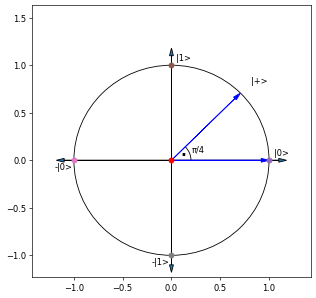

In [9]:
import matplotlib

draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(1,0,"")

draw_quantum_state(1/sqrttwo,1/sqrttwo,"|+>")

# drawing the angle with |0>-axis
from matplotlib.pyplot import gca, text
from matplotlib.patches import Arc
gca().add_patch( Arc((0,0),0.4,0.4,angle=0,theta1=0,theta2=45) )
text(0.08,0.05,'.',fontsize=30)
text(0.21,0.09,'\u03C0/4')

Text(0.21, 0.09, '3π/4')

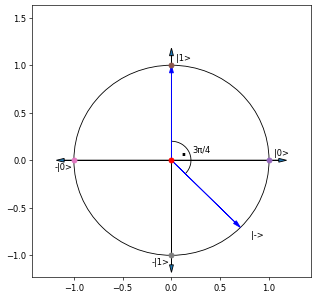

In [10]:
draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(0,1,"")

draw_quantum_state(1/sqrttwo,-1/sqrttwo,"|->")

# drawing the angle with |0>-axis
from matplotlib.pyplot import gca, text
from matplotlib.patches import Arc
gca().add_patch( Arc((0,0),0.4,0.4,angle=0,theta1=-45,theta2=90) )
text(0.08,0.05,'.',fontsize=30)
text(0.21,0.09,'3\u03C0/4')

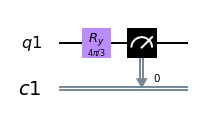

In [15]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from math import pi

# we define a quantum circuit with one qubit and one bit
q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

# angle of rotation in radian
rotation_angle = 2*pi/3

# rotate the qubit with rotation_angle
qc.ry(2*rotation_angle,q[0]) 

# measure the qubit
qc.measure(q,c)

# draw the circuit
qc.draw(output='mpl')

{'0': 257, '1': 743}


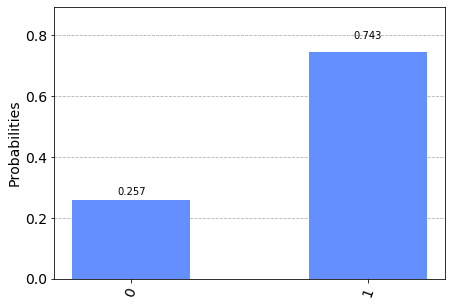

In [16]:
# execute the program 1000 times
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)

# print the results
counts = job.result().get_counts(qc)
print(counts)

# draw the histogram
plot_histogram(counts)

In [17]:
from math import sin,cos

# the quantum state
quantum_state = [ cos(rotation_angle) , sin (rotation_angle) ]
print("The quantum state is",round(quantum_state[0],4),"|0> +",round(quantum_state[1],4),"|1>")

the_expected_number_of_zeros = 1000*cos(rotation_angle)**2
the_expected_number_of_ones = 1000*sin(rotation_angle)**2

# expected results
print("The expected value of observing '0' is",round(the_expected_number_of_zeros,4))
print("The expected value of observing '1' is",round(the_expected_number_of_ones,4))

The quantum state is -0.5 |0> + 0.866 |1>
The expected value of observing '0' is 250.0
The expected value of observing '1' is 750.0


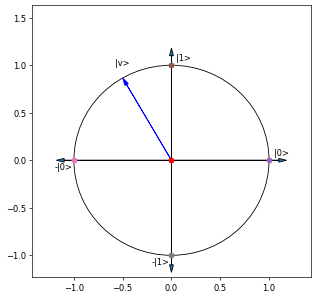

In [18]:
# draw the quantum state

#%run qlatvia.py

draw_qubit()

draw_quantum_state(quantum_state[0],quantum_state[1],"|v>")

In [36]:
from random import randrange
from math import sin,cos, pi

n = 1000

# randomly pick an angle
random_angle = randrange(360)
print("random angle is",random_angle)

# pick angle in radian
rotation_angle = random_angle/360*2*pi

# the quantum state
quantum_state = [ cos(rotation_angle) , sin (rotation_angle) ]

the_expected_number_of_zeros = n*cos(rotation_angle)**2
the_expected_number_of_ones = n*sin(rotation_angle)**2

# expected results
print("The expected value of observing '0' is",round(the_expected_number_of_zeros,4))
print("The expected value of observing '1' is",round(the_expected_number_of_ones,4))

random angle is 188
The expected value of observing '0' is 980.6308
The expected value of observing '1' is 19.3692


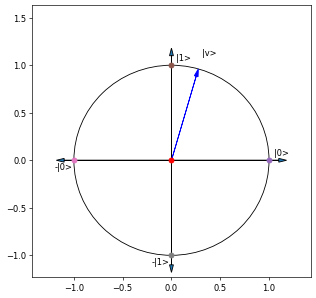

In [20]:
# draw the quantum state

#%run qlatvia.py

draw_qubit()

draw_quantum_state(quantum_state[0],quantum_state[1],"|v>")

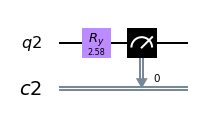

In [21]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

# we define a quantum circuit with one qubit and one bit
q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

# rotate the qubit with rotation_angle
qc.ry(2*rotation_angle,q[0]) 

# measure the qubit
qc.measure(q,c)

# draw the circuit
qc.draw(output='mpl')

{'0': 72, '1': 928}


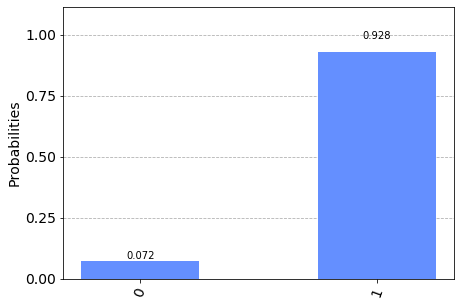

In [22]:
# execute the program 1000 times
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)

# print the results
counts = job.result().get_counts(qc)
print(counts)

the_observed_number_of_ones = 0
if '1' in counts:
    the_observed_number_of_ones= counts['1']

# draw the histogram
plot_histogram(counts)

In [23]:
difference = abs(the_expected_number_of_ones - the_observed_number_of_ones)
print("The expected number of ones is",the_expected_number_of_ones)
print("The observed number of ones is",the_observed_number_of_ones)
print("The difference is",difference)
print("The difference in percentage is",difference/100,"%")

The expected number of ones is 924.024048078213
The observed number of ones is 928
The difference is 3.9759519217869865
The difference in percentage is 0.03975951921786987 %
